# Goldman Sachs Chase & Co. Discussion Analysis

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("discussion_df (1).csv")

# Show basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  32 non-null     object
 1   role     32 non-null     object
 2   company  32 non-null     object
 3   content  32 non-null     object
 4   quarter  32 non-null     int64 
 5   year     32 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


In [ ]:
# Preview the first few rows
df.head()


,speaker,role,company,content,quarter,year
0,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,"Thank you, operator , good morning, everyone....",3,2024
1,Denis Coleman,Chief Financial Ofﬁcer,Goldman Sachs,"Thank you, David. Good morning. Let's start w...",3,2024
2,David Solomon,"CEO, Chairman",Goldman Sachs,"Thank you, operator , and good morning, every...",4,2024
3,Denis Coleman,CFO,Goldman Sachs,"Thank you, David, and good morning. Let's sta...",4,2024
4,Carey Halio,"Chief Strategy Ofﬁcer, Head of Investor Relations",Goldman Sachs,"Thank you. Good morning. This is Carey Halio,...",2,2023


## Speaker and Role Distribution

In [ ]:
# Unique speakers and their frequency
speaker_counts = df['speaker'].value_counts()
print(speaker_counts)

# Roles
role_counts = df['role'].value_counts()
print(role_counts)


speaker
David Solomon     13
Denis Coleman     12
Carey Halio        6
Dennis Coleman     1
Name: count, dtype: int64
role
Chief Financial Ofﬁcer                               10
Chairman, Chief Executive Ofﬁcer                      9
CEO, Chairman                                         3
CFO                                                   3
Head, Investor Relations                              2
Chief Strategy Ofﬁcer, Head of Investor Relations     1
Head of Investor Relations                            1
Chief Executive Ofﬁcer                                1
Chief Strategy Ofﬁcer, Head of IR                     1
Investor Relations                                    1
Name: count, dtype: int64


## Content Length Analysis

In [ ]:
# Add a column for content length
df['content_length'] = df['content'].apply(len)

# Summary statistics
df['content_length'].describe()


,content_length
count,32.000000
mean,6388.375000
std,3368.483307
min,694.000000
25%,4923.750000
50%,6778.500000
75%,8263.000000
max,12845.000000


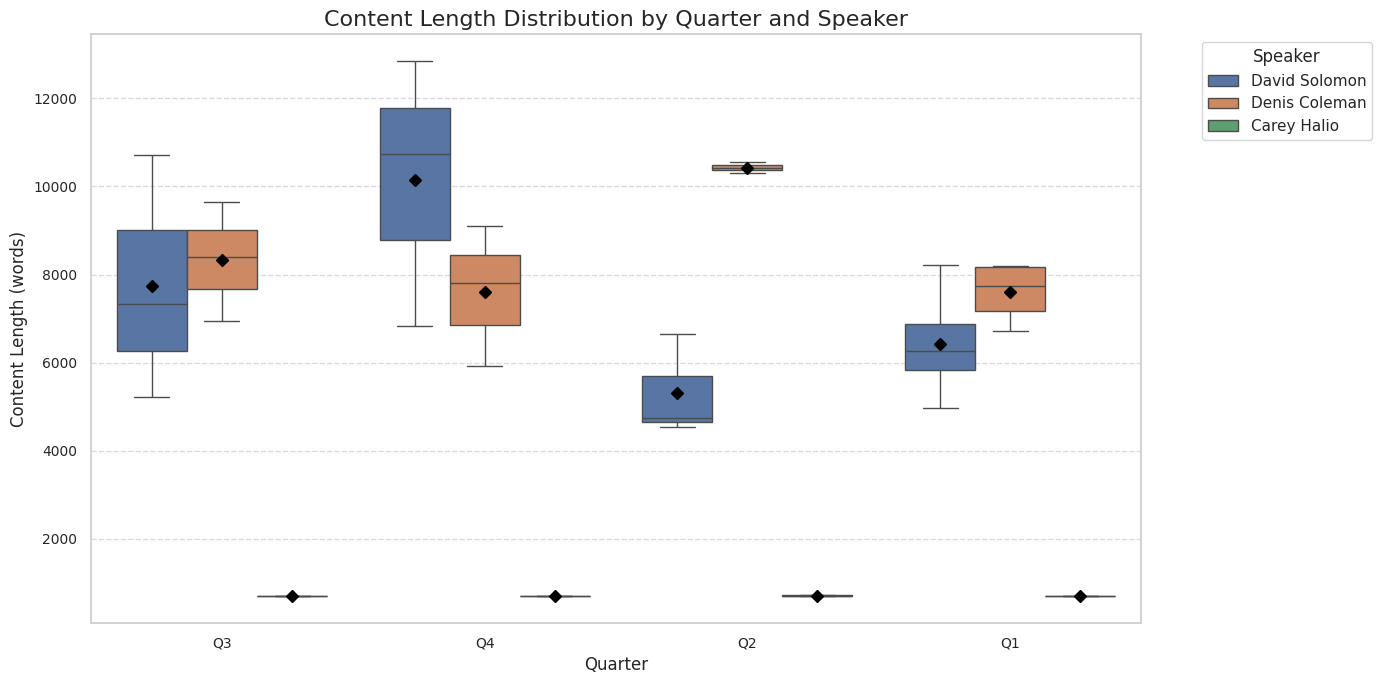

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix speaker name inconsistencies (trailing + internal whitespace)
df['speaker'] = df['speaker'].str.strip().str.replace(r'\s+', ' ', regex=True)

# Filter top 3 speakers for clarity (optional, remove if you want all)
top_speakers = df['speaker'].value_counts().head(3).index.tolist()
df_filtered = df[df['speaker'].isin(top_speakers)].copy() # Create a copy

# Custom color palette - Updated to include top speakers
custom_palette = {
    "David Solomon": "#4c72b0",
    "Denis Coleman": "#dd8452",
    "Carey Halio": "#55a868"  # Added a color for Carey Halio
}


# Format quarter as labels (Q1, Q2, ...)
df_filtered.loc[:, 'quarter_label'] = "Q" + df_filtered['quarter'].astype(str) # Use .loc for explicit indexing

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=df_filtered,
    x="quarter_label",
    y="content_length",
    hue="speaker",
    palette=custom_palette,
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
)

# Customize labels and aesthetics
plt.title("Content Length Distribution by Quarter and Speaker", fontsize=16)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Content Length (words)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Trends Over Time

In [ ]:
# Count entries by year and quarter
df.groupby(['year', 'quarter']).size().unstack(fill_value=0)


quarter,1,2,3,4
year,,,,
2022,3,3,3,3
2023,3,3,2,2
2024,2,2,2,2
2025,2,0,0,0


## Word Count Analysis

In [ ]:
# Add word count column
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['word_count'].describe()


,word_count
count,32.00000
mean,1038.03125
std,544.26384
min,111.00000
25%,822.75000
50%,1116.50000
75%,1320.75000
max,2088.00000


## Word Cloud of All Content

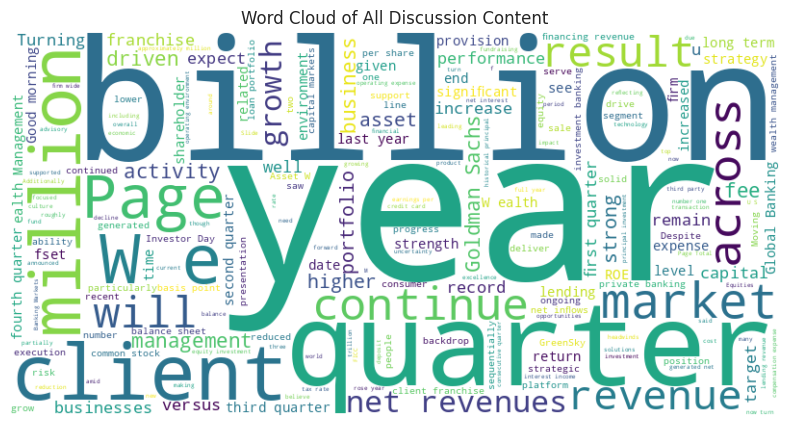

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Discussion Content")
plt.show()


## Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Compute polarity and subjectivity
df['sentiment_polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Summary
df[['sentiment_polarity', 'sentiment_subjectivity']].describe()


,sentiment_polarity,sentiment_subjectivity
count,32.000000,32.000000
mean,0.155224,0.371174
std,0.109254,0.066024
min,0.028574,0.200000
25%,0.086268,0.339816
50%,0.137002,0.375000
75%,0.173757,0.402639
max,0.500000,0.500000


<ipython-input-12-6caf7d4ec19d>:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.boxplot(
<ipython-input-12-6caf7d4ec19d>:37: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


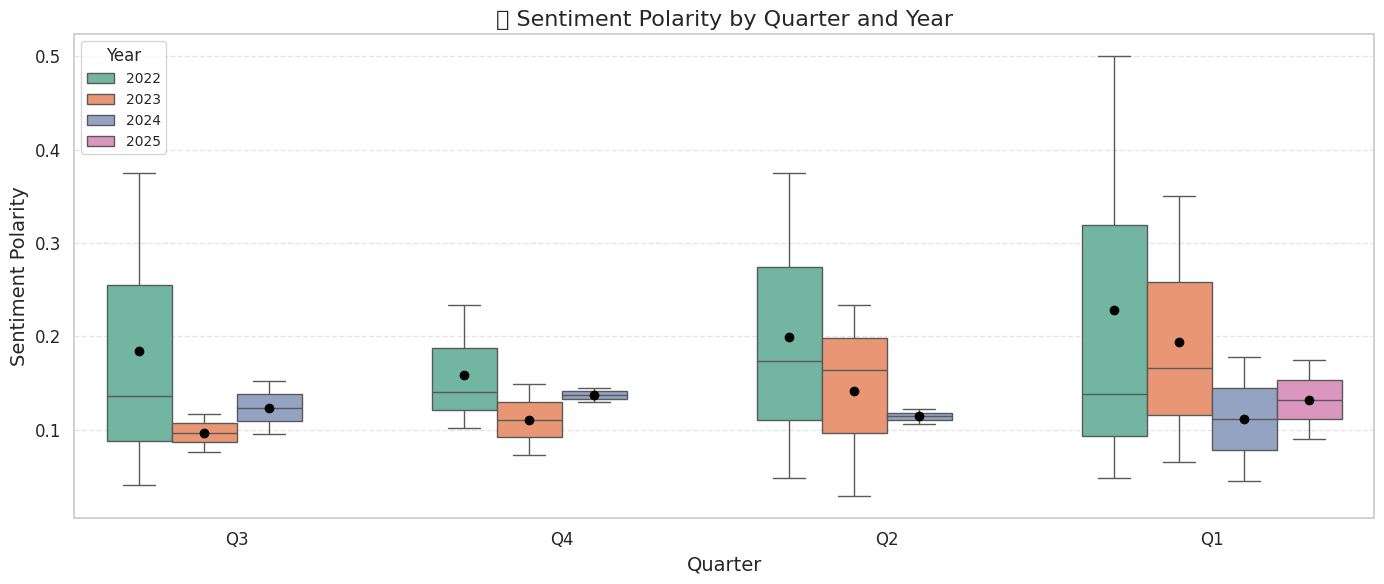

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: convert quarter number to 'Q1', 'Q2', ...
df['quarter_label'] = "Q" + df['quarter'].astype(str)

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Custom palette (optional)
palette = sns.color_palette("Set2")

# Plot
ax = sns.boxplot(
    data=df,
    x='quarter_label',  # use Q1/Q2...
    y='sentiment_polarity',
    hue='year',
    palette=palette,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Labels and title
plt.title("Sentiment Polarity by Quarter and Year", fontsize=16)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Sentiment Polarity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend formatting
plt.legend(title='Year', title_fontsize=12, fontsize=10, loc='upper left')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Financial Keywords - Focused Analysis

### Word Cloud: Financial Content Only

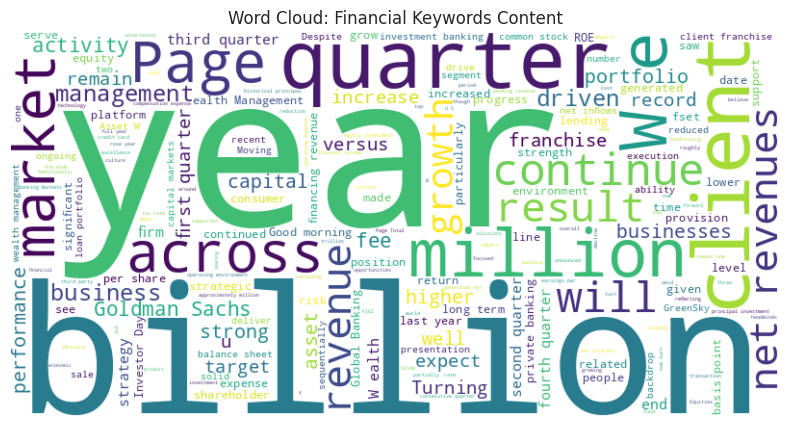

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define financial keywords pattern
financial_keywords = [
    'revenue', 'earnings', 'expenses', 'costs', 'income', 'profit',
    'loss', 'guidance', 'forecast', 'margin', 'capital', 'liquidity',
    'dividend', 'debt', 'loan', 'credit', 'assets', 'liabilities',
    'balance sheet', 'interest', 'net income'
]

# Create a regex pattern
pattern = '|'.join(financial_keywords)

# Filter financial-related content
financial_text_series = df[df['content'].str.contains(pattern, case=False, regex=True, na=False)]['content']
financial_text = " ".join(financial_text_series)

# Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(financial_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Financial Keywords Content")
plt.show()


### Sentiment Analysis: Financial Content

In [ ]:
from textblob import TextBlob

# Filter and compute sentiment on financial content
df['financial_flag'] = df['content'].str.contains(
    '|'.join([
        'revenue', 'earnings', 'expenses', 'costs', 'income', 'profit',
        'loss', 'guidance', 'forecast', 'margin', 'capital', 'liquidity',
        'dividend', 'debt', 'loan', 'credit', 'assets', 'liabilities',
        'balance sheet', 'interest', 'net income'
    ]), case=False, na=False)

financial_df = df[df['financial_flag']].copy()
financial_df['sentiment_polarity'] = financial_df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
financial_df['sentiment_subjectivity'] = financial_df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

financial_df[['year', 'quarter', 'sentiment_polarity', 'sentiment_subjectivity']]


,year,quarter,sentiment_polarity,sentiment_subjectivity
0,2024,3,0.152080,0.364532
1,2024,3,0.094972,0.335786
2,2024,4,0.144947,0.445917
3,2024,4,0.129337,0.395353
4,2023,2,0.233333,0.200000
5,2023,2,0.163647,0.385253
6,2023,2,0.028574,0.337964
7,2022,1,0.500000,0.500000
8,2022,1,0.138068,0.401458
9,2022,1,0.047662,0.361732


<ipython-input-15-ae43a8406b34>:45: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


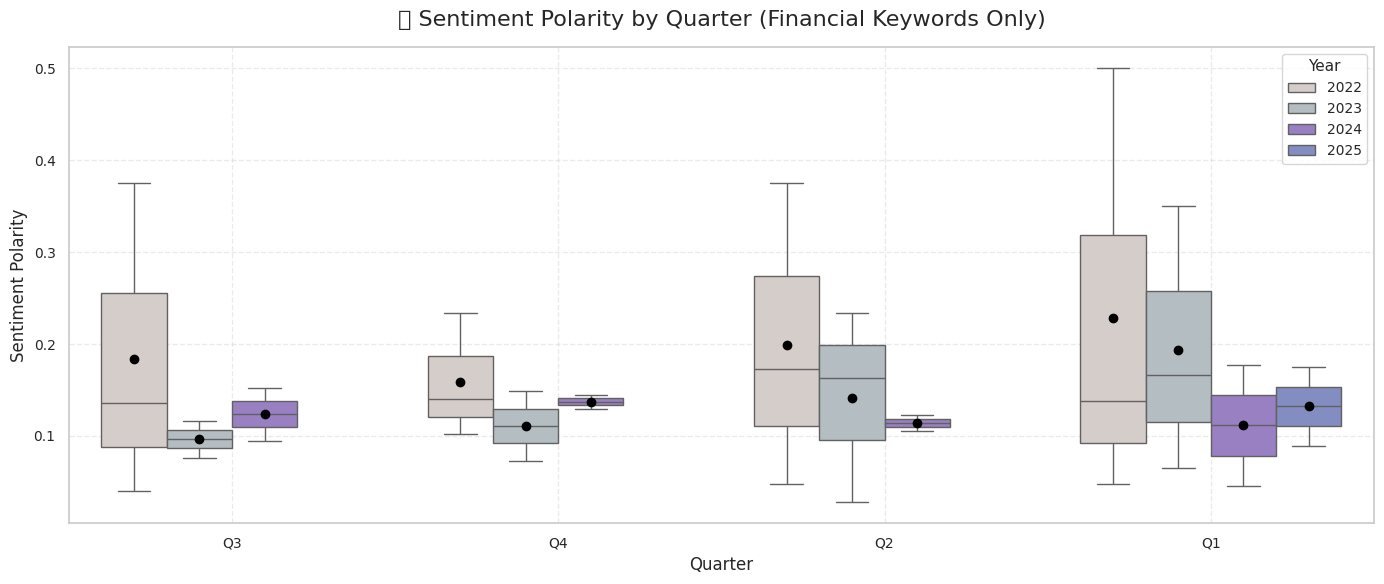

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create a clearer quarter label
df['quarter_label'] = "Q" + df['quarter'].astype(str)

# Set custom color palette (muted and financial-feel)
palette = {
    2022: "#D7CCC8",  # light taupe
    2023: "#B0BEC5",  # steel grey
    2024: "#9575CD",  # soft violet
    2025: "#7986CB",  # dusty blue
}

plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=df,
    x='quarter_label',
    y='sentiment_polarity',
    hue='year',
    palette=palette,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "black",
        "markeredgecolor": "black",
        "markersize": 6,
    }
)

# Customize labels and title
ax.set_title("💹 Sentiment Polarity by Quarter (Financial Keywords Only)", fontsize=16, pad=15)
ax.set_xlabel("Quarter", fontsize=12)
ax.set_ylabel("Sentiment Polarity", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

# Legend tweaks
ax.legend(title="Year", title_fontsize=11, fontsize=10)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Key Insights:

Quarterly Distribution (Q1 to Q4)
Each quarter shows a wide range of sentiment scores—indicating speaker variation (i.e., some participants are more positive/negative).

The black dots represent mean sentiment polarity for each year-quarter combo.

1. Q1 (First Quarter):
2022 & 2023 have very wide interquartile ranges (IQR), especially 2022 (range up to 0.5).

Suggests a volatile or inconsistent tone, possibly reflecting market uncertainty or mixed signals in management's messaging.

2024 & 2025 show narrower distributions, with means around 0.11–0.15, indicating more controlled/neutral sentiment.

2. Q2:
2022 again shows a wide spread with a higher median and mean (~0.2).

2023 onward shows tighter clustering, especially 2024–2025, suggesting more consistent sentiment expression.

Gradual narrowing implies possibly more refined communication or reduced uncertainty.

3. Q3:
2022 Q3 stands out with high mean and wide spread (outliers up to ~0.37).

Subsequent years show tighter control in language and sentiment.

2024 and 2025 means converge near 0.12–0.14, hinting at a standardized tone.

4 Q4:
A converging trend is clear: by 2024–2025, most sentiment scores cluster tightly with minimal outliers.

This suggests increasing homogeneity or a toned-down communication strategy from management over time.

# Interpretations:
2022–2023: More expressive and varied sentiment – possibly due to market volatility, COVID-era uncertainties, or leadership adjustments.

2024–2025: Reduced spread and tighter means – suggesting either:

Controlled and consistent communication (possibly PR/media-trained execs).

Or, decreasing informational tone in transcripts (less forward-looking optimism/pessimism).

## Data Cleaning: Boilerplate and Custom Stopwords

In [ ]:
import re

# Boilerplate removal patterns
boilerplate_patterns = [
    r'^thanks, operator[.,]?', r'^good (morning|afternoon|evening)[.,]?',
    r'^thank you( very much)?[.,]?', r'^hi everyone[.,]?', r'^welcome( to.*)?[.,]?',
    r'^okay[.,]?', r'^all right[.,]?', r'^let me start by saying[.,]?'
]
combined_pattern = re.compile(r'|'.join(boilerplate_patterns), re.IGNORECASE)

def clean_boilerplate(text):
    return combined_pattern.sub('', text).strip()

# Custom domain stopwords
custom_stopwords = {
    'operator', 'thank', 'thanks', 'morning', 'afternoon', 'evening',
    'okay', 'welcome', 'everyone', 'hi', 'start', 'saying', 'speak', 'speaking'
}

def remove_custom_stopwords(text):
    words = text.lower().split()
    filtered = [word for word in words if word not in custom_stopwords]
    return ' '.join(filtered)

df['content_clean'] = df['content'].apply(clean_boilerplate).apply(remove_custom_stopwords)


## N-gram Analysis: Top Bigrams and Trigrams

<ipython-input-17-7aea6ace7655>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ngram_df, x='count', y='ngram', palette='Blues_d')


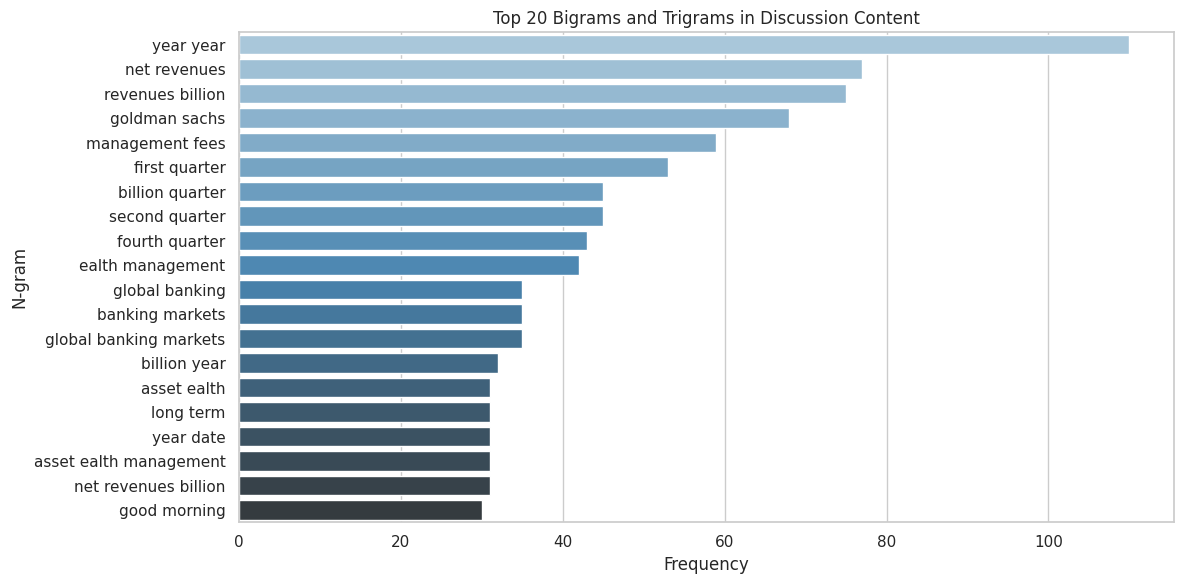

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', min_df=2)
X = vectorizer.fit_transform(df['content_clean'])

sum_words = X.sum(axis=0)
ngram_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
top_ngram_df = pd.DataFrame(ngram_freq[:20], columns=['ngram', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_ngram_df, x='count', y='ngram', palette='Blues_d')
plt.title("Top 20 Bigrams and Trigrams in Discussion Content")
plt.xlabel("Frequency")
plt.ylabel("N-gram")
plt.tight_layout()
plt.show()


# Observations from Frequent N-grams:

- Most Frequent:

"year year" appears most often — this is likely a text processing artifact (repetition or misparsed phrase), not meaningful.

"net revenues", "revenues billion", "goldman sachs" are highly frequent — indicating strong emphasis on financial performance and branding.

- Financial Focus:

"net revenues", "revenues billion", "management fees", "billion quarter", "global banking markets":

These suggest the core discussion revolves around profitability, revenue streams, and business divisions.

- Time References:

"first quarter", "second quarter", "fourth quarter", "billion year", "year date":

Temporal references signal breakdowns of performance by period — standard for earnings calls.

These can be mapped to quarterly performance and sentiment changes (link with earlier sentiment plots).

- Divisional Focus:

"wealth management", "asset wealth", "global banking", "banking markets":

Indicates frequent mentions of key business lines.

Suggests strategic areas that the management emphasizes regularly.

<ipython-input-18-bf62bfc847bd>:30: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  stock_quarterly = stock_hist['Close'].resample('Q').last().pct_change() * 100
<ipython-input-18-bf62bfc847bd>:34: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_quarterly['quarter_year'] = stock_quarterly['Date'].dt.to_period('Q')
<ipython-input-18-bf62bfc847bd>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-18-bf62bfc847bd>:64: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


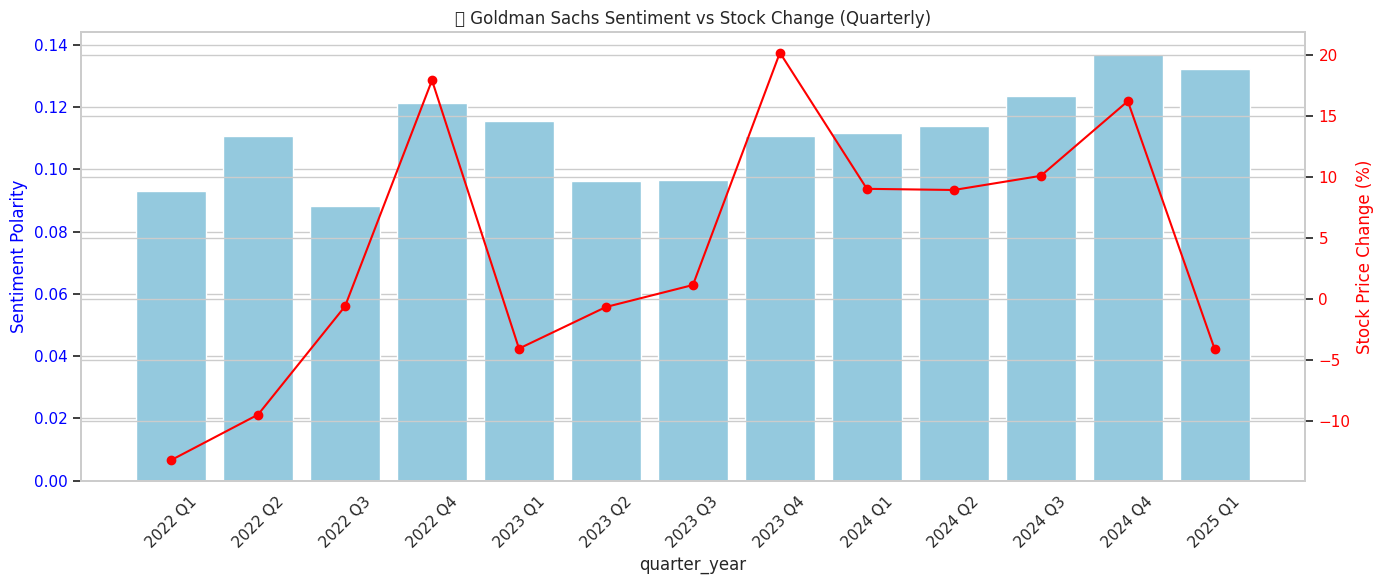

In [ ]:
# Install yfinance (if needed)
!pip install yfinance

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from textblob import TextBlob

# Load Sentiment Data
discussion_df = pd.read_csv("discussion_df (1).csv")

# Filter: Financial Keywords and Clean
financial_keywords = ["net income", "interest expense", "capital", "revenue", "credit", "loan"]
discussion_df["text_lower"] = discussion_df["content"].str.lower()
discussion_df = discussion_df[discussion_df["text_lower"].str.contains('|'.join(financial_keywords))]

# Sentiment Polarity
discussion_df["sentiment_polarity"] = discussion_df["content"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Quarter-Year Label
discussion_df["quarter_year"] = discussion_df["year"].astype(str) + " Q" + discussion_df["quarter"].astype(str)

# Download GS stock data and compute quarterly percent change
gs = yf.Ticker("GS")
stock_hist = gs.history(period="5y", interval="1d")

# Resample to quarterly, compute percent change
stock_quarterly = stock_hist['Close'].resample('Q').last().pct_change() * 100
stock_quarterly = stock_quarterly.reset_index()

# Create 'quarter_year' format
stock_quarterly['quarter_year'] = stock_quarterly['Date'].dt.to_period('Q')
stock_quarterly['quarter_year'] = stock_quarterly['quarter_year'].apply(lambda x: f"{x.year} Q{x.quarter}")

# Rename and prepare final DataFrame
stock_df = stock_quarterly[['quarter_year', 'Close']].rename(columns={'Close': 'stock_change_pct'})

# Compute Sentiment by Quarter
sentiment_summary = discussion_df.groupby("quarter_year")["sentiment_polarity"].mean().reset_index()
sentiment_summary.columns = ["quarter_year", "mean_sentiment"]

# Merge sentiment and stock data
merged_df = pd.merge(sentiment_summary, stock_df, on="quarter_year", how="left")

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for sentiment
sns.barplot(data=merged_df, x="quarter_year", y="mean_sentiment", color='skyblue', ax=ax1)
ax1.set_ylabel("Sentiment Polarity", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("🧠 Goldman Sachs Sentiment vs Stock Change (Quarterly)")

# Line plot for stock % change
ax2 = ax1.twinx()
ax2.plot(merged_df["quarter_year"], merged_df["stock_change_pct"], color='red', marker='o', label="Stock % Change")
ax2.set_ylabel("Stock Price Change (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Layout
fig.tight_layout()
plt.show()

# Sentiment Polarity
This shows the average sentiment polarity from Goldman Sachs quarterly transcripts, filtered for financial keywords.

Scale: Ranges from 0 to ~0.14 (higher values mean more positive sentiment).

- Line Plot (Right Y-Axis): Stock Price Change (%)
Represents quarter-over-quarter percentage change in Goldman Sachs (GS) stock price.

Scale: From ~–10% to 20% change.

# Key Observations:

- 2022 Q4 – High Sentiment & Strong Stock Surge
Sentiment peaks (~0.122) and stock jumps ~19%.

Interpretation: Market may have positively reacted to optimistic tone or strong guidance.


- 2023 Q4 – Highest Sentiment But…
Highest sentiment observed (~0.138), but stock only modestly up (~10%).

Suggests other market forces may have tempered price reaction despite positive sentiment.

- 2024 Q4 – Another Strong Signal
Sentiment remains high (~0.135), and stock follows with a ~16% gain.

Good alignment: possibly a strong earnings release or guidance.

- 2025 Q1 – Sentiment Still High, But Stock Drops
Sentiment still elevated (~0.13), but stock declines ~5%.

Possibility: market was pricing in future uncertainty, or fundamentals didn't match the tone.

- Periods of Divergence

2023 Q1: Sentiment ~0.115, stock down ~5%.

2024 Q1: Sentiment 0.112, stock flat (+0.5%).

These breaks may indicate market skepticism or lag between sentiment and market reaction.

# General Trend:
Positive correlation exists between sentiment and stock price change but not consistently.

Suggests sentiment is a partial indicator – effective but not sole predictor of price movement.